In [18]:
# display, transform, read, split ...
import numpy as np
import cv2 as cv
import os
import splitfolders
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D

In [10]:
datagen = ImageDataGenerator()

In [11]:
# define classes name
class_names = ['daisy','dandelion','roses','sunflowers','tulips']

In [12]:
# training data
train_generator = datagen.flow_from_directory( 
    directory="C:/Users/root/flower_data/data-split/train/", 
    classes = class_names,
    target_size=(224, 224),  
    batch_size=32, 
    class_mode="binary", 
)

Found 1270 images belonging to 5 classes.


In [13]:
# validation data
valid_generator = datagen.flow_from_directory( 
    directory="C:/Users/root/flower_data/data-split/val/", 
    classes = class_names,
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="binary", 
)

Found 362 images belonging to 5 classes.


In [14]:
# test data
test_generator = datagen.flow_from_directory( 
    directory="C:/Users/root/flower_data/data-split/test/", 
    classes = class_names,
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="binary", 
)

Found 184 images belonging to 5 classes.


In [15]:
base_model = DenseNet169(input_shape=(224,224,3), 
                   include_top=False,
                   weights="imagenet")

51877672/51877672 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [16]:
# Freezing Layers

for layer in base_model.layers:
    layer.trainable=False

In [19]:
# Building Model

model=Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(64,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(5,activation='softmax'))

In [20]:
# define training function
def trainModel(model, epochs, optimizer):
    batch_size = 32
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model.fit(train_generator, validation_data=valid_generator, epochs=epochs, batch_size=batch_size)

In [21]:
# launch the training
model_history = trainModel(model = model, epochs = 10, optimizer = "Adam")

Epoch 1/10


C:\Users\root\anaconda3\envs\DL\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 185s 4s/step - accuracy: 0.2554 - loss: 1.7884 - val_accuracy: 0.4558 - val_loss: 1.3582
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 146s 4s/step - accuracy: 0.5164 - loss: 1.2089 - val_accuracy: 0.7099 - val_loss: 1.1569
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 147s 4s/step - accuracy: 0.5856 - loss: 0.9561 - val_accuracy: 0.7486 - val_loss: 0.9762
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 144s 4s/step - accuracy: 0.6464 - loss: 0.7815 - val_accuracy: 0.7790 - val_loss: 0.8183
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 144s 4s/step - accuracy: 0.6477 - loss: 0.7269 - val_accuracy: 0.7845 - val_loss: 0.7155
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 144s 4s/step - accuracy: 0.6946 - loss: 0.6626 - val_accuracy: 0.7845 - val_loss: 0.6210
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 145s 4s/step - accuracy: 0.7432 - loss: 0.6037 - val_accuracy: 0.8011 - val_loss: 0.5619
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 145s 4s/step - accuracy: 0.7357 - loss: 0.5865 - val_accuracy: 0.8094 - val_loss: 0.

#https://www.kaggle.com/code/darthmanav/alzheimer-s-classification-densenet-169

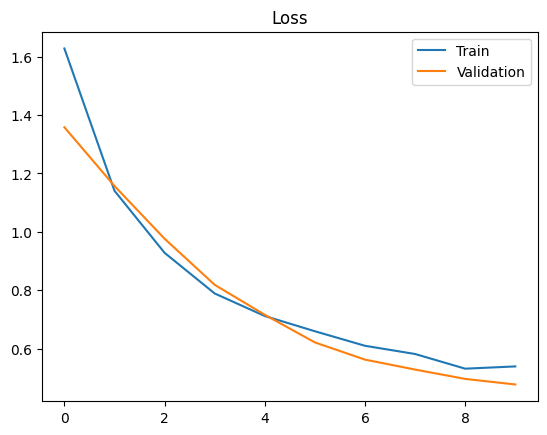

In [22]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

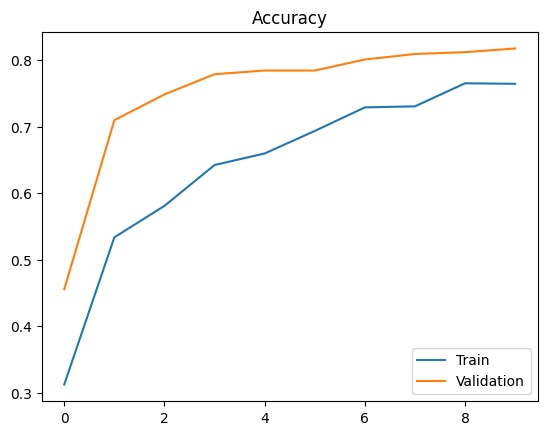

In [23]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

In [24]:
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.8405 - loss: 0.4803
The test loss is:  0.481428861618042
The best accuracy is:  83.69565010070801


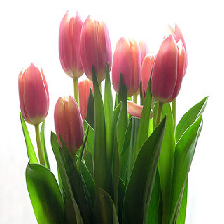

In [25]:
img = tf.keras.preprocessing.image.load_img('C:/Users/root/flower_data/data-split/test/tulip/112428665_d8f3632f36_n.jpg', target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array]) 
img

In [26]:
# generate predictions for samples
predictions = model.predict(img_array)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
[[0.22953436 0.7227485  0.01659578 0.01421769 0.0169037 ]]


In [27]:
# generate argmax for predictions
class_id = np.argmax(predictions, axis = 1)
print(class_id)

[1]


In [28]:
# transform classes number into classes name
class_names[class_id.item()]

'dandelion'